In [1]:
from email.policy import default
from operator import index
from tkinter import Radiobutton

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sympy import false

df_bureau = pd.read_csv("../Data/bureau_data.csv")
df_customers = pd.read_csv("../Data/customers.csv")
df_loans = pd.read_csv("../Data/loans.csv")
print(df_bureau.shape)
print(df_customers.shape)
print(df_loans.shape)

(50000, 8)
(50000, 12)
(50000, 15)


<h2 align='center'>Collecting Data<h2>

In [2]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [3]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [4]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [5]:
df_cus_bureau = pd.merge(df_customers, df_bureau, on="cust_id", how="inner")
df = pd.merge(df_cus_bureau, df_loans, on='cust_id', how="inner")
print(df.shape)
df.head()


(50000, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

In [7]:
df.drop(['cust_id', 'city', 'state', 'loan_id', 'disbursal_date', 'installment_start_dt'], axis=1, inplace=True)
df.shape

(50000, 27)

### Split Data to avoid leakage 

In [8]:
X_train = df.drop('default', axis=1)
y_train = df['default']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 26), (12500, 26), (37500,), (12500,))

In [10]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [11]:
print(df_train.shape)
df_train.head(3)

(37500, 27)


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
44124,34,M,Single,Salaried,600000,0,Mortgage,18,380001,2,...,Secured,2197000,2152000,43040.0,387360,1721600,30,357273,319551,False
835,42,F,Single,Self-Employed,1730000,1,Mortgage,13,500001,4,...,Secured,5770000,4360000,87200.0,784800,3488000,32,1280238,621793,False
363,44,F,Single,Self-Employed,644000,0,Owned,17,600001,3,...,Secured,1004000,765000,15300.0,137700,612000,42,401449,119318,False


In [12]:
print(df_test.shape)
df_test.head(3)

(12500, 27)


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
27632,45,M,Married,Self-Employed,369000,2,Mortgage,21,400001,2,...,Secured,559000,449000,8980.0,80820,359200,22,201059,123809,False
36119,28,F,Single,Salaried,802000,2,Rented,29,380001,4,...,Secured,1414000,1277000,25540.0,229860,1021600,20,409393,200705,False
4796,44,F,Single,Salaried,100000,1,Owned,11,560001,2,...,Unsecured,78000,64000,1280.0,11520,51200,8,46079,44873,False


<h2 align='center'>Data Cleaning<h2>

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 44124 to 17673
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37500 non-null  int64  
 1   gender                       37500 non-null  object 
 2   marital_status               37500 non-null  object 
 3   employment_status            37500 non-null  object 
 4   income                       37500 non-null  int64  
 5   number_of_dependants         37500 non-null  int64  
 6   residence_type               37452 non-null  object 
 7   years_at_current_address     37500 non-null  int64  
 8   zipcode                      37500 non-null  int64  
 9   number_of_open_accounts      37500 non-null  int64  
 10  number_of_closed_accounts    37500 non-null  int64  
 11  total_loan_months            37500 non-null  int64  
 12  delinquent_months            37500 non-null  int64  
 13  total_dpd        

In [14]:
df_train.isna().sum()

age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
default                         0
dtype: int64

In [15]:
df_train[df_train['residence_type'].isna()]

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
49744,49,M,Single,Self-Employed,311000,1,NaN,17,411001,3,...,Secured,517000,363000,7260.0,65340,290400,28,177073,86007,False
47226,39,F,Single,Self-Employed,1354000,1,NaN,12,302001,2,...,Secured,4517000,4476000,89520.0,805680,3580800,44,785176,391219,False
42276,58,F,Married,Self-Employed,1602000,2,NaN,18,560001,3,...,Unsecured,1225000,942000,18840.0,169560,753600,8,678239,387830,False
48554,43,M,Married,Self-Employed,2518000,3,NaN,23,411001,2,...,Secured,8587000,8036000,160720.0,1446480,6428800,24,1341217,1126361,False
43476,34,F,Married,Salaried,2225000,3,NaN,13,302001,3,...,Unsecured,1986000,1930000,38600.0,347400,1544000,17,1063592,1184258,False
36797,41,M,Married,Self-Employed,1227000,5,NaN,17,411001,4,...,Secured,2056000,1463000,29260.0,263340,1170400,44,832874,512081,False
30193,47,F,Married,Self-Employed,624000,5,NaN,30,400001,1,...,Secured,1846000,1561000,31220.0,280980,1248800,25,372644,186699,False
42175,31,M,Married,Salaried,2383000,2,NaN,31,411001,2,...,Secured,3497000,3083000,61660.0,554940,2466400,28,1227301,1087303,False
17961,33,F,Single,Self-Employed,2663000,0,NaN,23,302001,1,...,Secured,3639000,3443000,68860.0,619740,2754400,33,1421855,1281365,False
27977,32,M,Married,Self-Employed,783000,4,NaN,30,110001,2,...,Unsecured,717000,699000,13980.0,125820,559200,17,357296,380419,False


In [16]:
df_train['residence_type'].dtype

dtype('O')

In [17]:
df_train['residence_type'].unique()

array(['Mortgage', 'Owned', 'Rented', nan], dtype=object)

In [18]:
df_train['residence_type'].value_counts()

residence_type
Owned       21312
Mortgage     8759
Rented       7381
Name: count, dtype: int64

In [19]:
# Calculate 
df_train['residence_type'].mode()

0    Owned
Name: residence_type, dtype: object

In [20]:
#Replace N/A values by the mode value
df_train.fillna('Owned', inplace=True)
df_train.isna().sum()

age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
default                        0
dtype: int64

In [21]:
df_test.isna().sum()

age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 14
years_at_current_address        0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
default                         0
dtype: int64

In [22]:
df_test.fillna('Owned', inplace=True)
df_test.isna().sum()

age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
default                        0
dtype: int64

In [23]:
df_train.duplicated().sum()

0

In [24]:
df_test.duplicated().sum()

0

### Get rid of outliers

In [25]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application
count,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,37500.000000,3.750000e+04,3.750000e+04
mean,39.547280,2.654627e+06,1.936213,16.028107,419183.453333,2.498053,1.001440,76.113867,4.866133,26.787600,5.013200,43.392427,4.727736e+06,4.019594e+06,8.090953e+04,7.235269e+05,3.215675e+06,25.934960,1.343668e+06,9.936482e+05
std,9.834662,2.633862e+06,1.537130,8.934267,168431.930541,1.119882,0.814872,43.793592,5.831272,32.728183,2.029059,29.360562,6.282130e+06,5.395820e+06,1.195013e+05,9.712476e+05,4.316656e+06,12.414895,1.216301e+06,1.047461e+06
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,-1.000000e+00,0.000000e+00
25%,33.000000,8.130000e+05,0.000000,8.000000,302001.000000,1.000000,0.000000,42.000000,0.000000,0.000000,4.000000,18.000000,1.161000e+06,9.770000e+05,1.954000e+04,1.758600e+05,7.816000e+05,16.000000,4.295002e+05,2.897845e+05
50%,40.000000,1.902000e+06,2.000000,16.000000,411001.000000,2.000000,1.000000,71.000000,3.000000,14.000000,5.000000,39.000000,2.673000e+06,2.255000e+06,4.510000e+04,4.059000e+05,1.804000e+06,24.000000,1.005119e+06,6.718000e+05
75%,46.000000,3.351000e+06,3.000000,24.000000,560001.000000,4.000000,2.000000,107.000000,9.000000,46.000000,6.000000,67.000000,5.202250e+06,4.628000e+06,9.256000e+04,8.330400e+05,3.702400e+06,35.000000,1.794239e+06,1.240969e+06
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,4.000000,2.000000,223.000000,24.000000,171.000000,9.000000,99.000000,5.212700e+07,4.781900e+07,5.698030e+06,8.607420e+06,3.825520e+07,59.000000,5.000000e+06,7.846643e+06


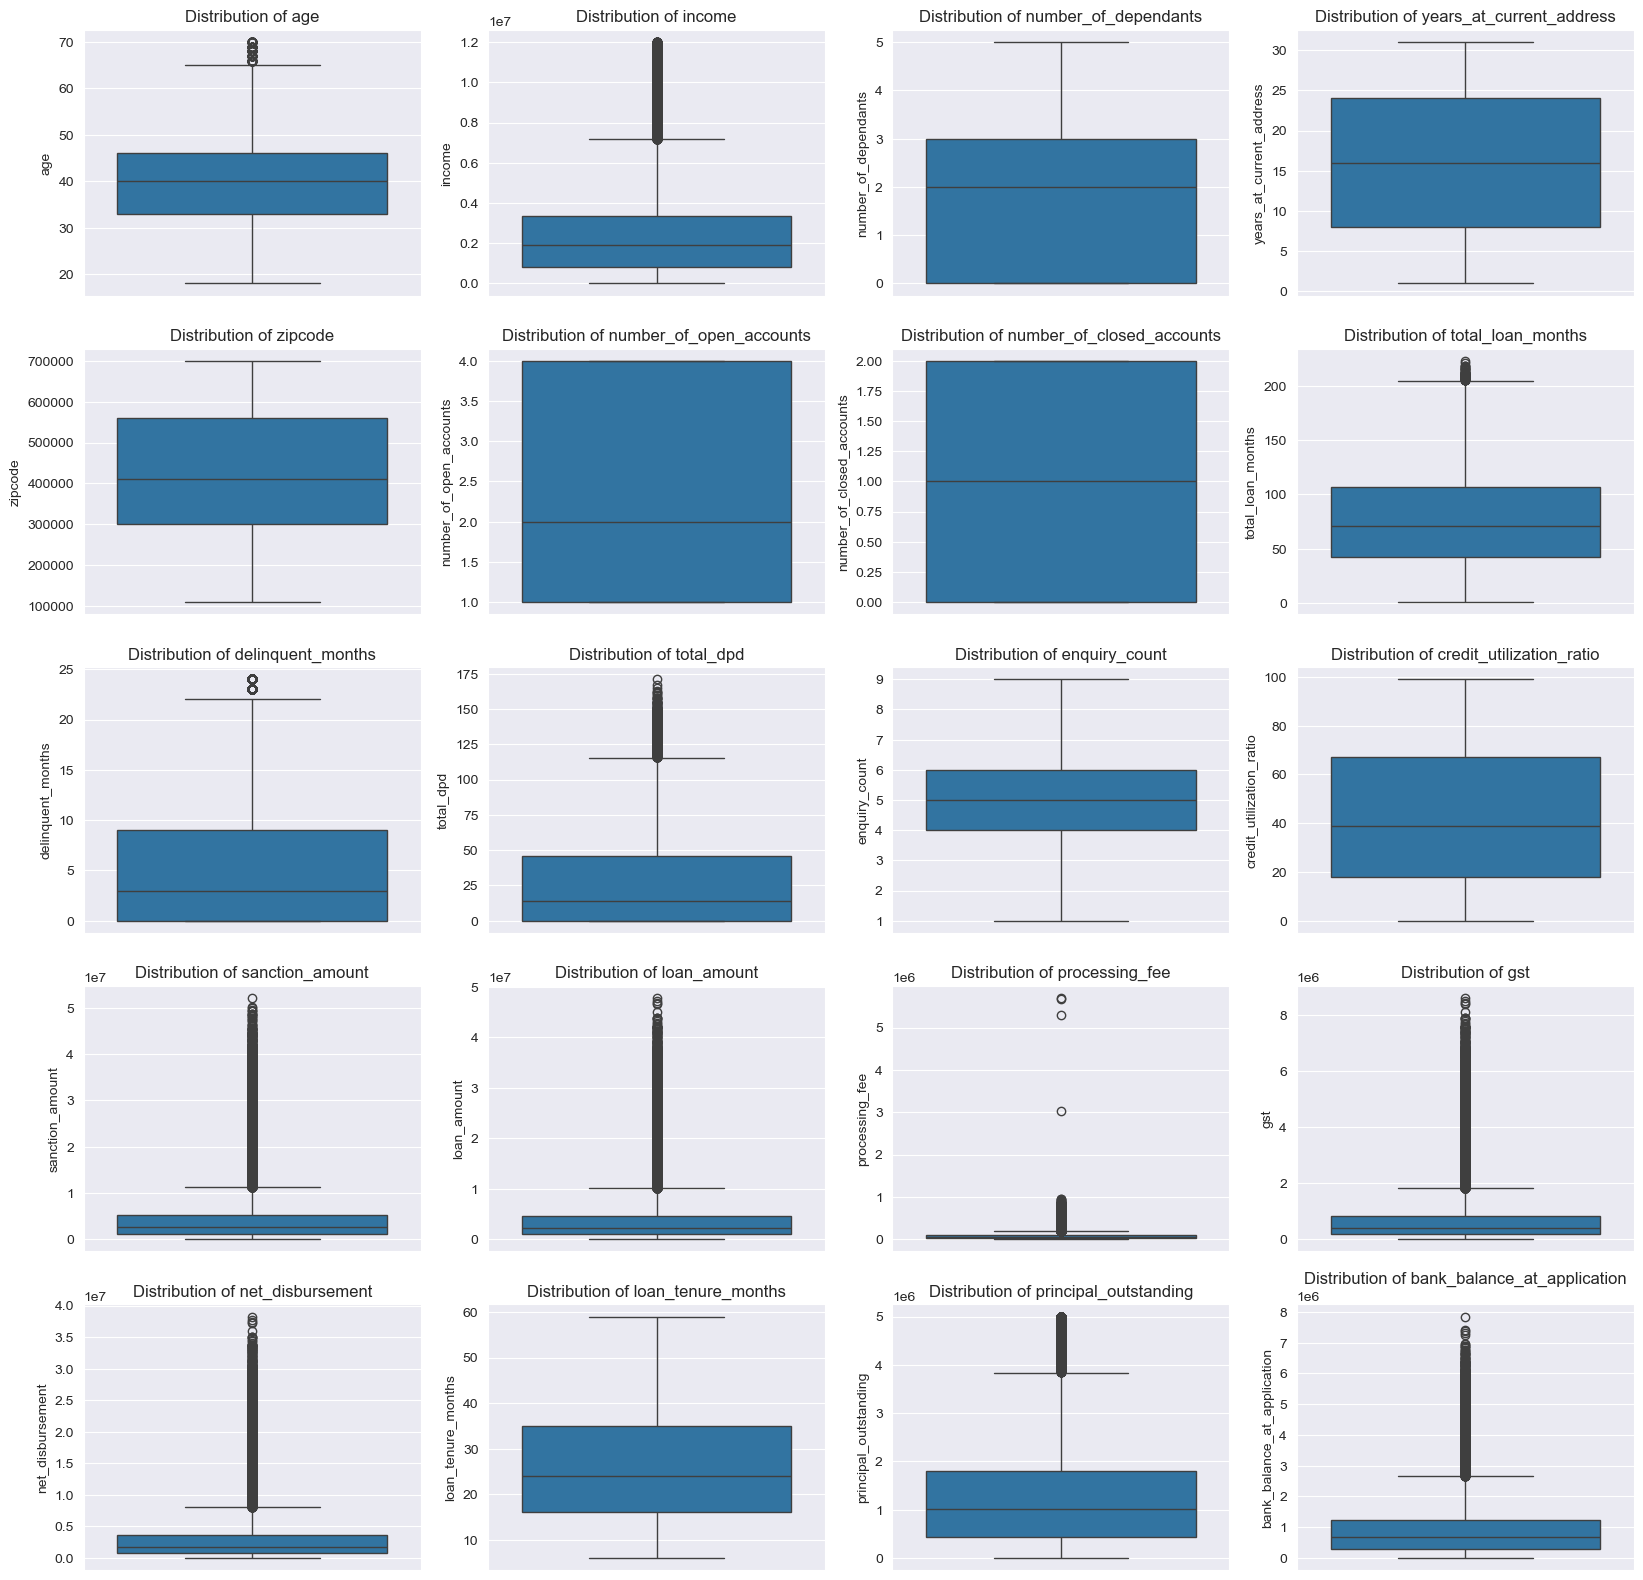

In [26]:
column_numerical = df_train.select_dtypes(include=['int64', 'float64'])
# print(column_numerical.shape)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()
for idx, col in enumerate(column_numerical):
    sns.boxplot(y=df_train[col], ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")
plt.show()


In [27]:
# Processing fee if the value greater than 3% of loan amount, that's outliers
df_train[(df_train['processing_fee']) > (df_train['loan_amount'] * 0.03)].shape

(4, 27)

In [28]:
# Get the train value with processing fee < 3%
df_train = df_train[(df_train['processing_fee']) < (df_train['loan_amount'] * 0.03)]
df_train.shape



(37491, 27)

In [29]:
# Do shame on test data
df_test[(df_test['processing_fee']) > (df_test['loan_amount'] * 0.03)].shape

(3, 27)

In [30]:
df_test = df_test[(df_test['processing_fee']) < (df_test['loan_amount'] * 0.03)]
df_test.shape

(12494, 27)

#### Check wrong spelling

In [31]:
columns_object = df_train.select_dtypes(include=['object']).columns
for col in columns_object:
    print(f"{col} --> {df_train[col].unique()}")

gender --> ['M' 'F']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Mortgage' 'Owned' 'Rented']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']


In [32]:
df_train['loan_purpose'] = df_train['loan_purpose'].replace("Personaal", "Personal")
df_test['loan_purpose'] = df_test['loan_purpose'].replace("Personaal", "Personal")

In [33]:
df_train['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [34]:
df_test['loan_purpose'].unique()

array(['Education', 'Personal', 'Home', 'Auto'], dtype=object)

<h2 align = 'center'>Explore Data Analysis <h2>

#### 1/ Explore numerical columns

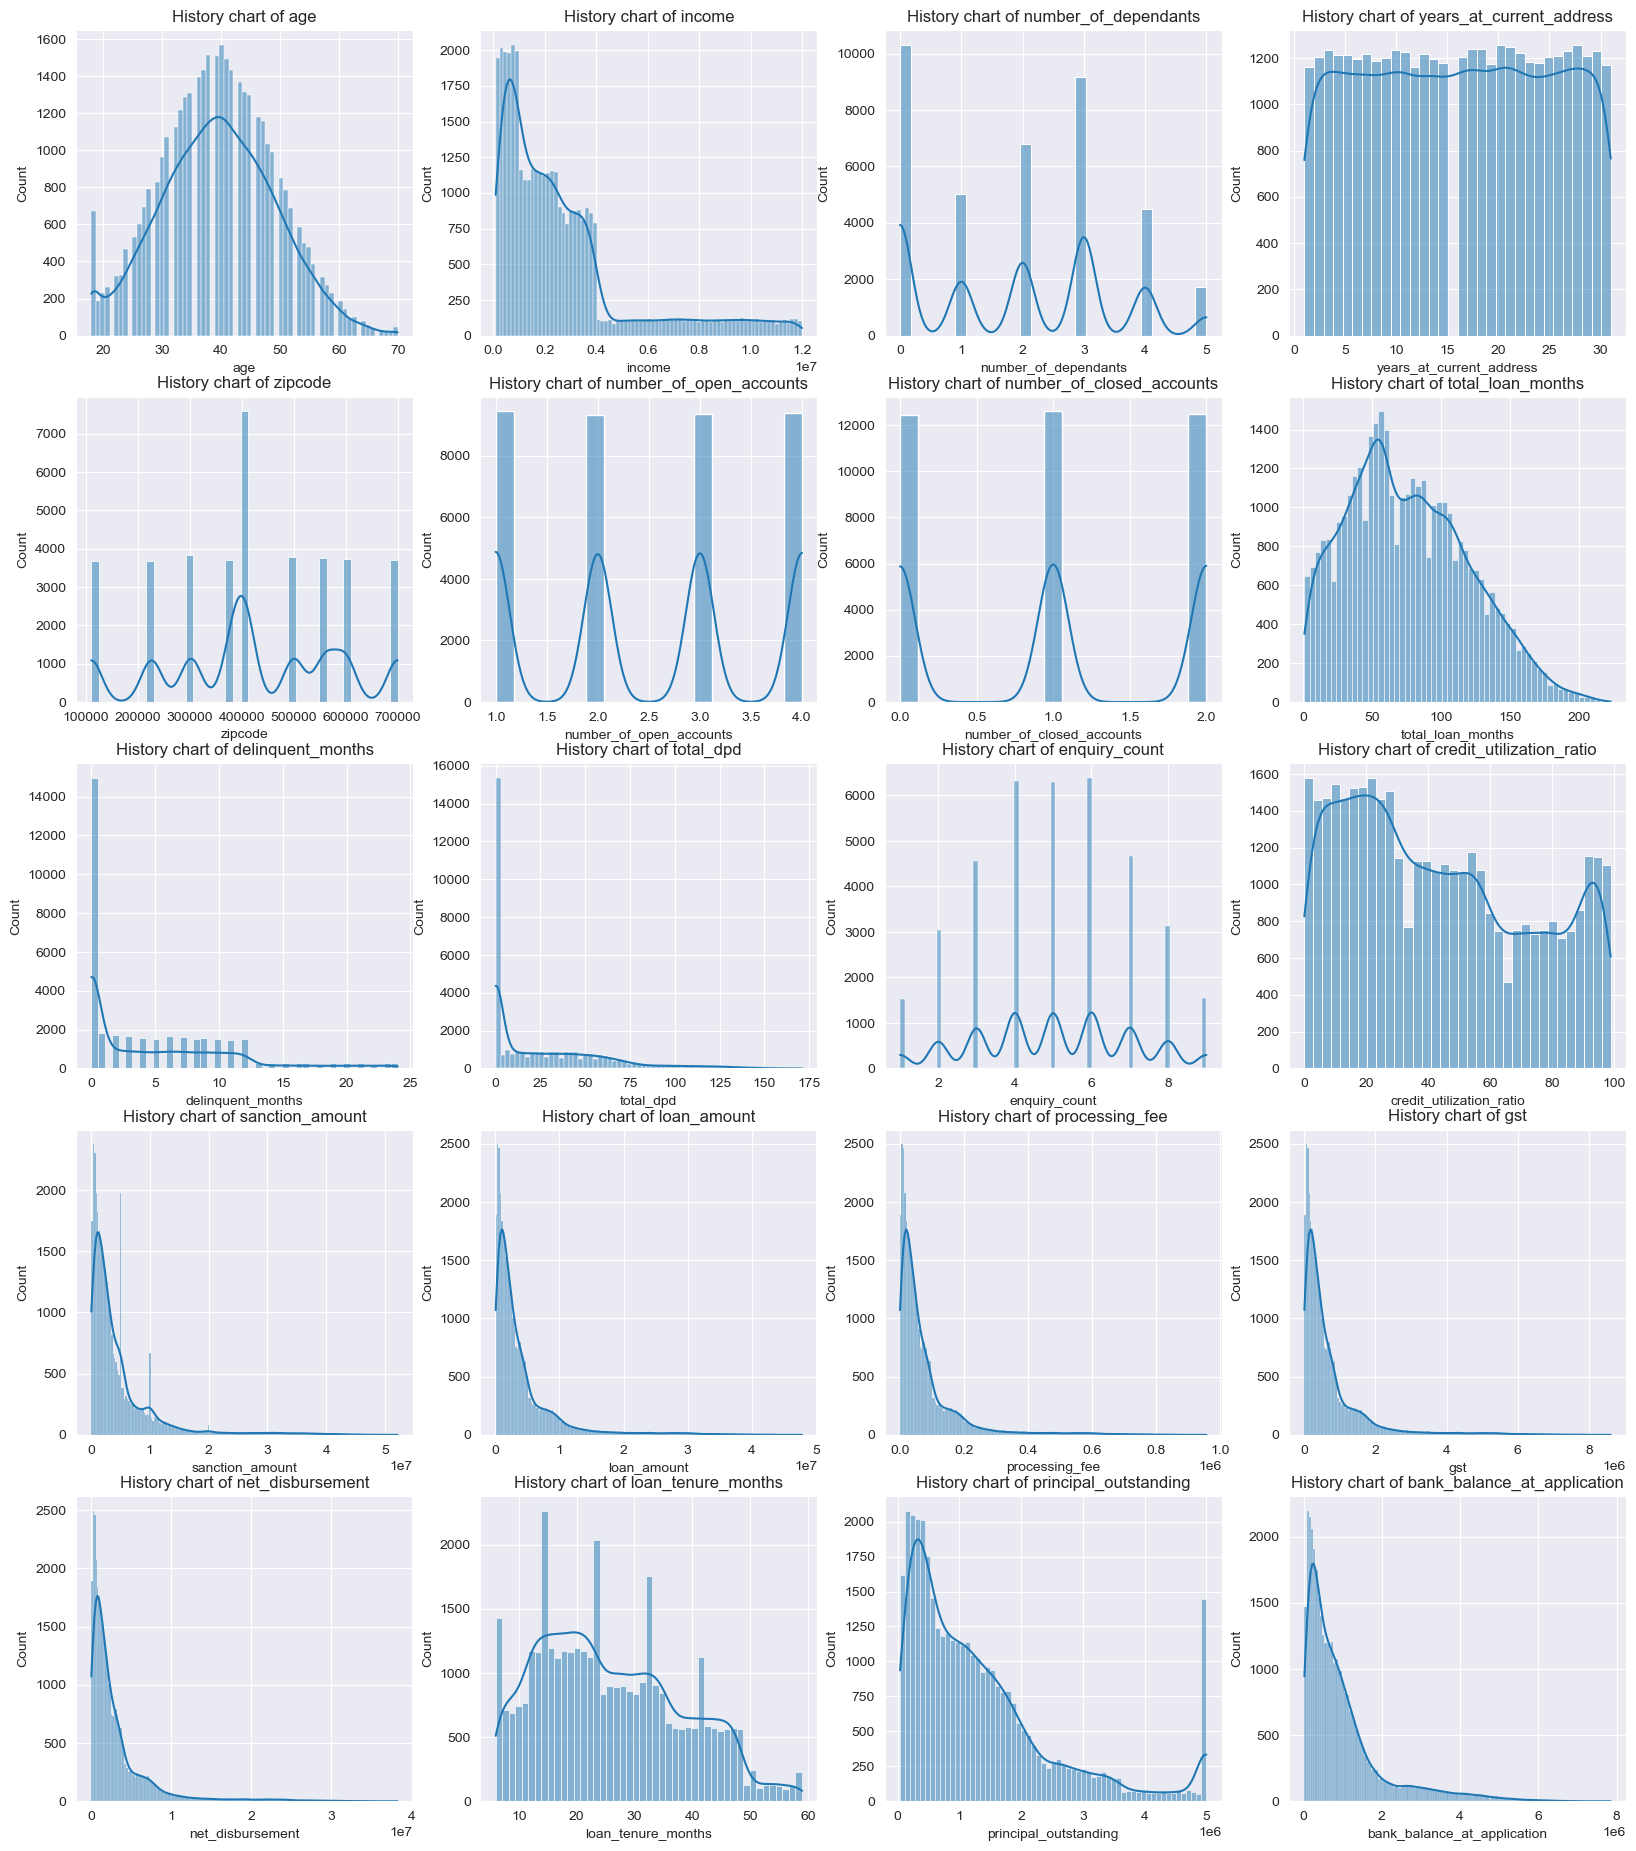

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 23))
axes = axes.flatten()
for idx, col in enumerate(column_numerical):
    sns.histplot(df_train, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f"History chart of {col}")
plt.show()

#### 2/ Explore categorical columns

In [36]:
columns_object

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'loan_purpose', 'loan_type'],
      dtype='object')

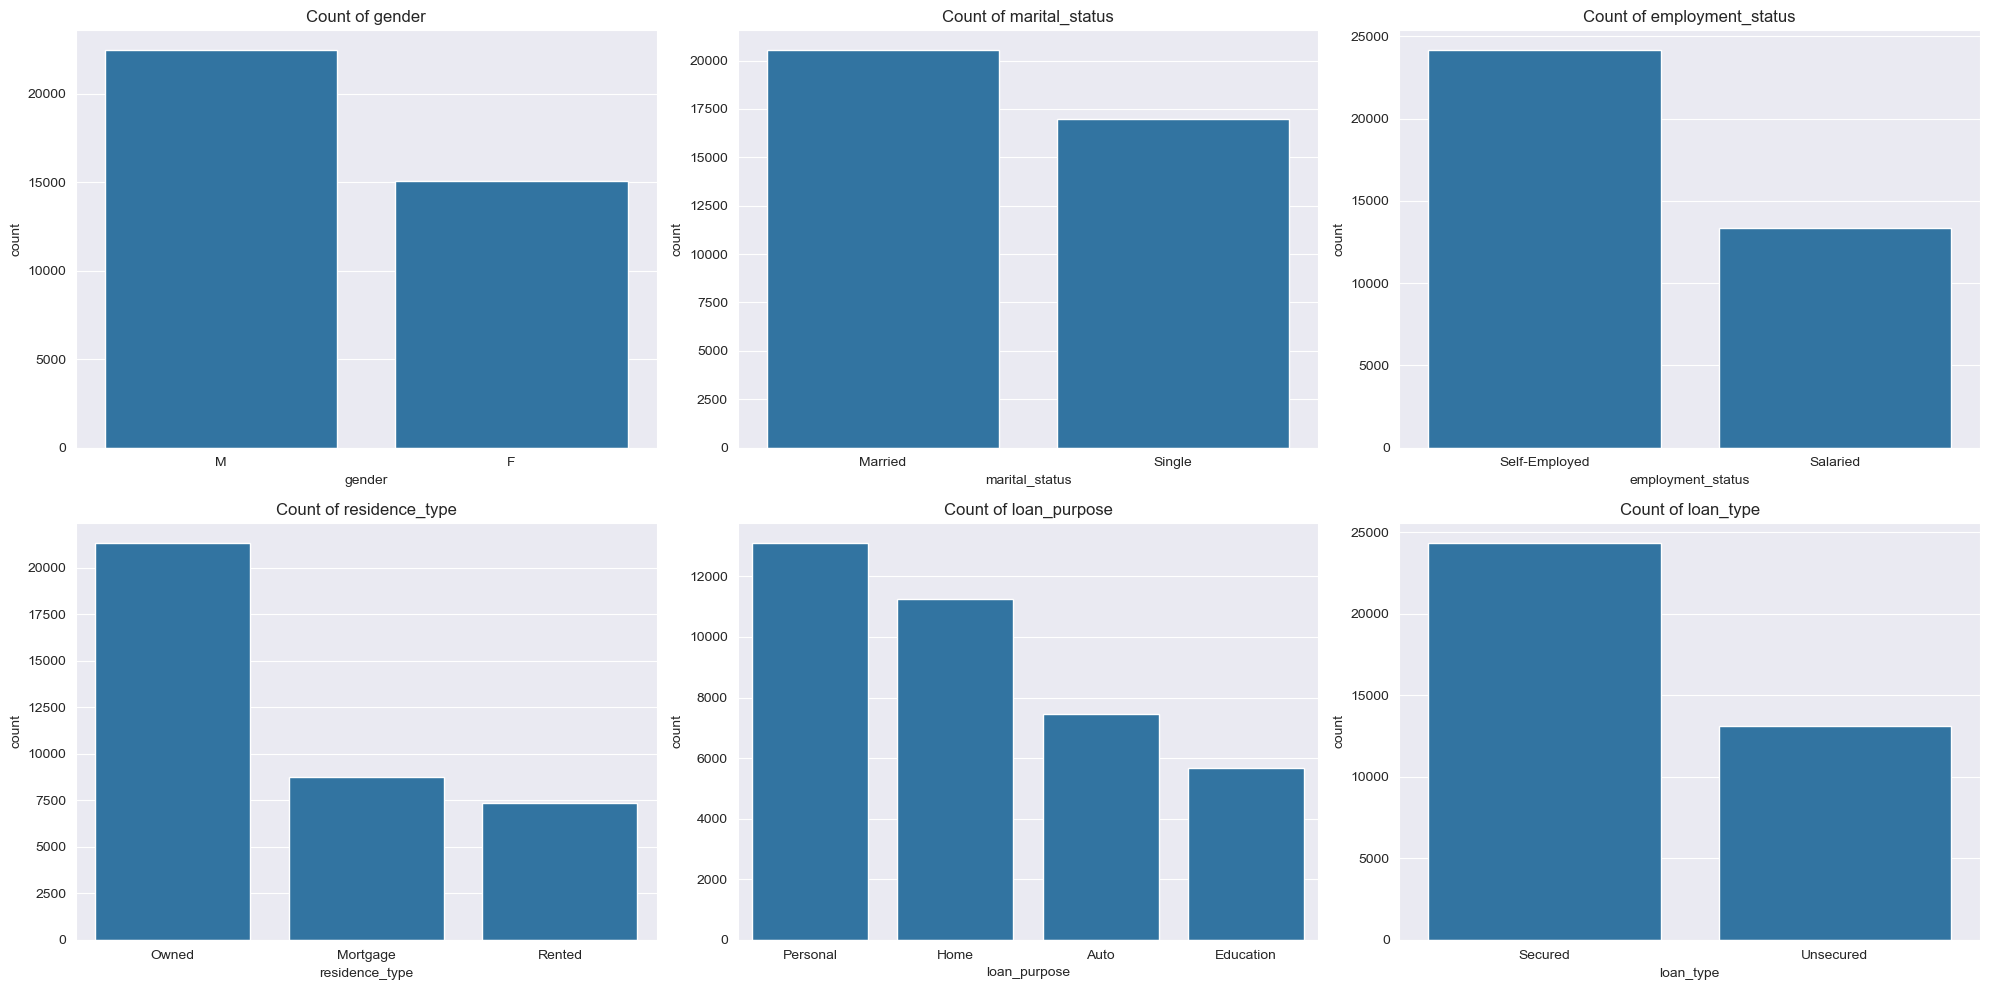

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
for idx, col in enumerate(columns_object):
    sns.countplot(df_train, x=col, ax=axes[idx], order=df_train[col].value_counts().index)
    axes[idx].set_title(f"Count of {col}")
plt.tight_layout()
plt.show()

#### Explore kdeplot to compare the feature of numerical columns with target "default" column

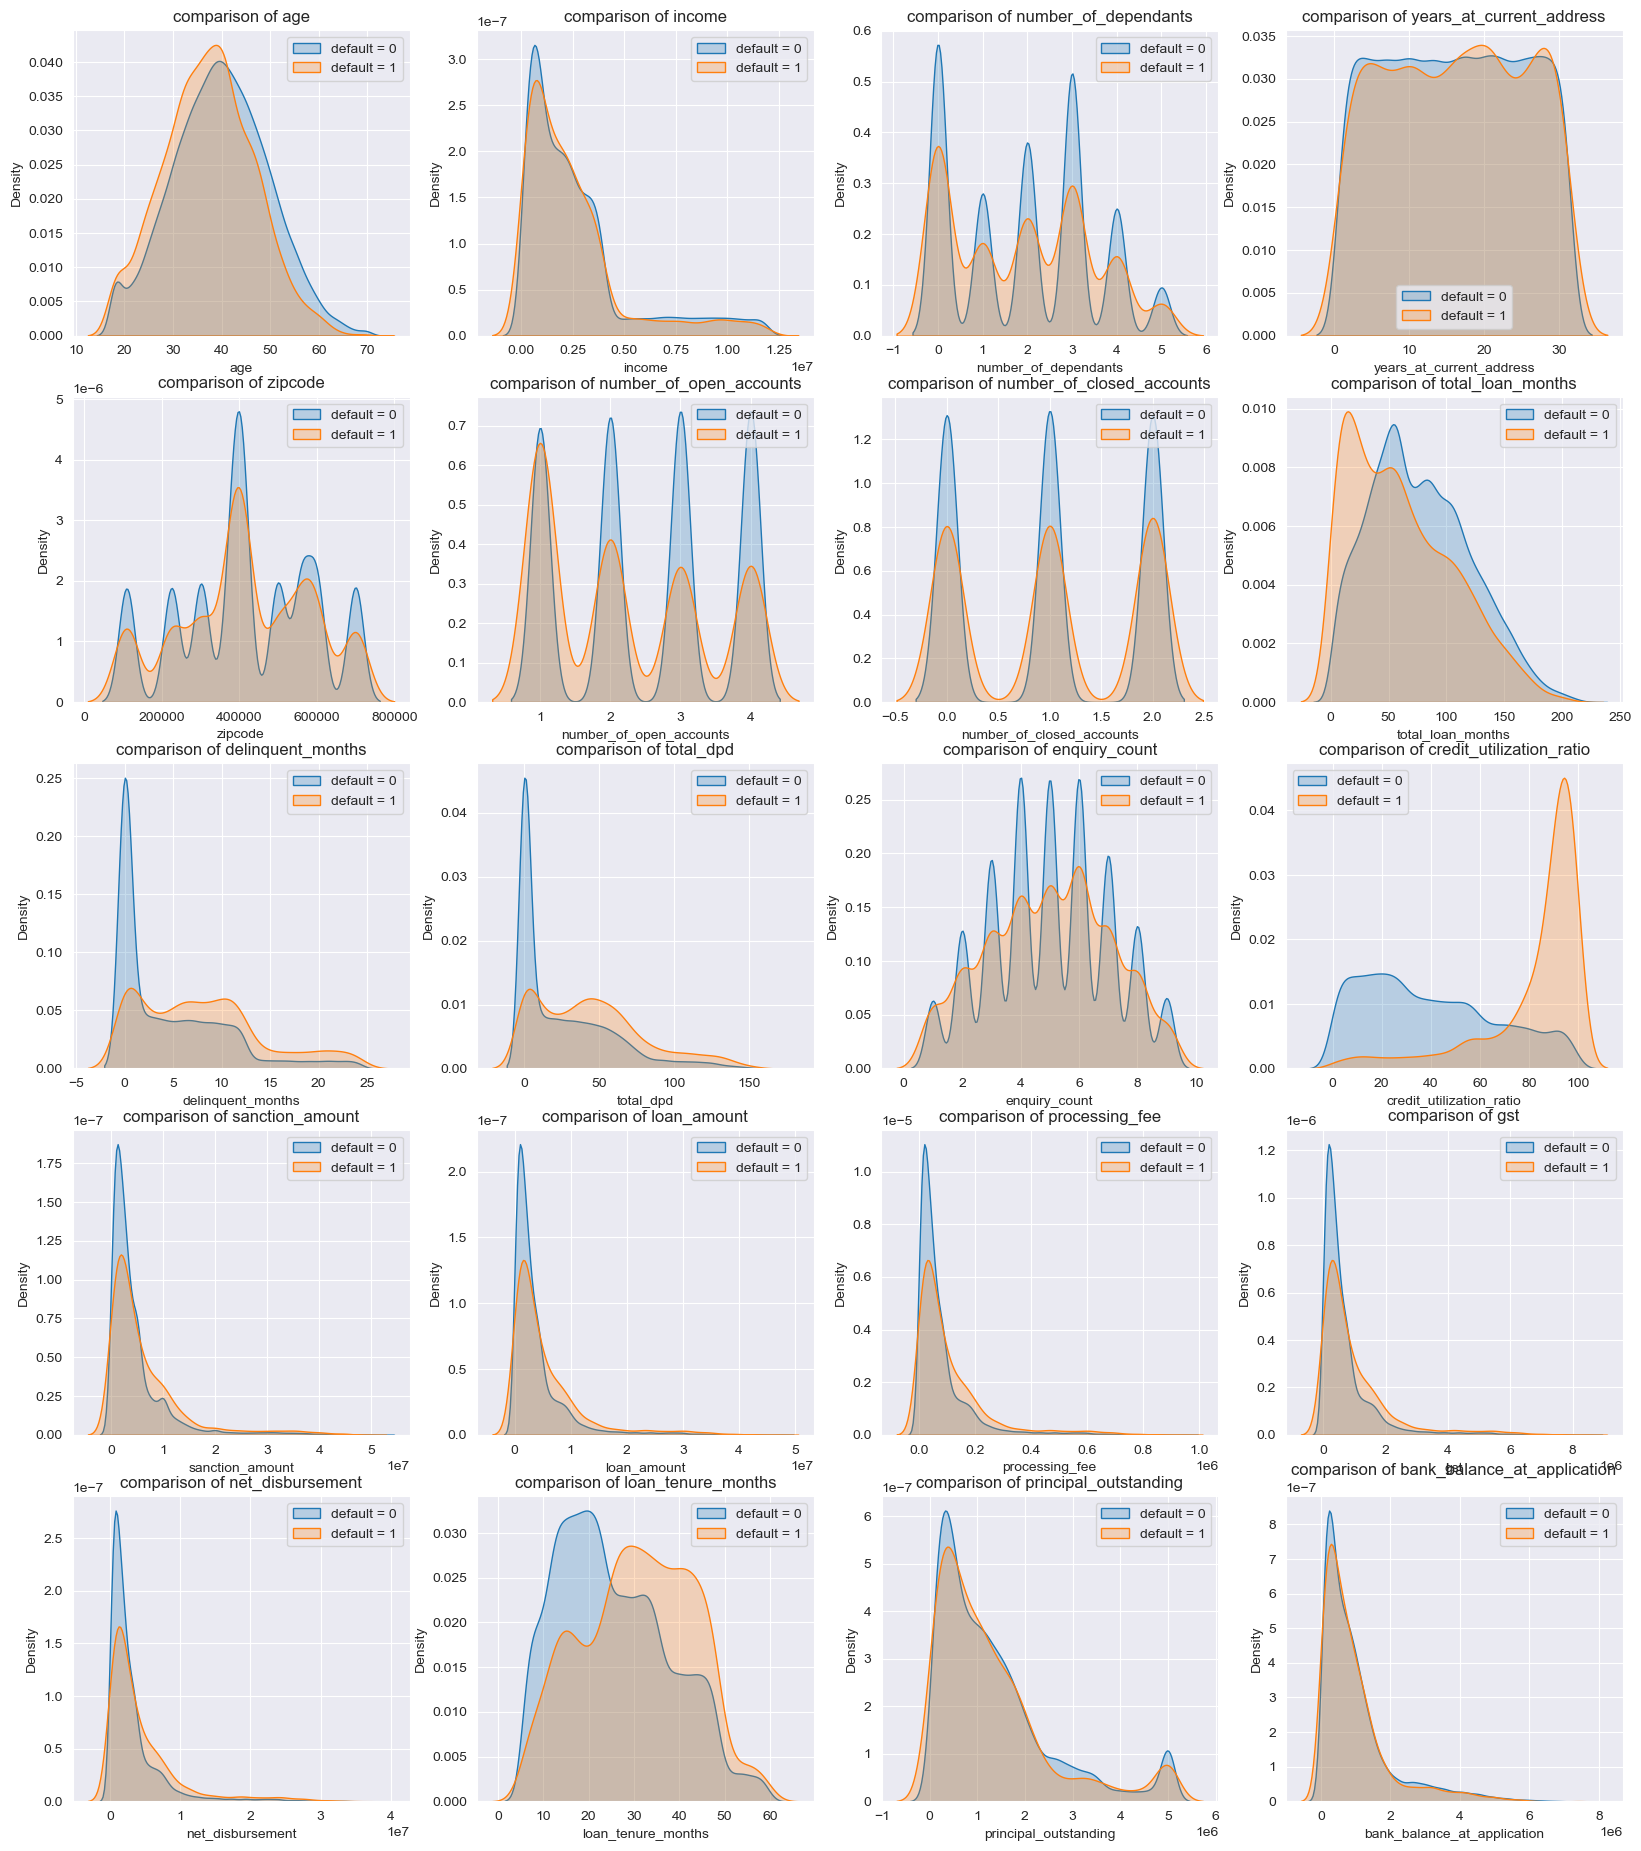

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 23))
axes = axes.flatten()
for idx, col in enumerate(column_numerical):
    sns.kdeplot(df_train[df_train['default'] == 0][col], fill=True, label='default = 0', ax=axes[idx])
    sns.kdeplot(df_train[df_train['default'] == 1][col], fill=True, label='default = 1', ax=axes[idx])
    axes[idx].set_title(f"comparison of {col}")
    axes[idx].legend()
plt.show()

<h2 align='center'>Feature Engineering<h2>

### 1/ Working with numerical columns
* Here are the suggestions for feature engineering
* a. Loan to Income ratio is a better metric compared to loan amount and income as individual features
* b. Delinquent months to loan months ratio is a better metric compared to those two individual features
* c. Average DPD per delinquent month is a better metric compared to total dpd and total delinquent

In [39]:
# a. Loan to Income ratio is a better metric compared to loan amount and income as individual features
df_train['loan_to_income'] = df_train['loan_amount'] / df_train['income']
df_test['loan_to_income'] = df_test['loan_amount'] / df_test['income']
df_train.head(2)

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,loan_to_income
44124,34,M,Single,Salaried,600000,0,Mortgage,18,380001,2,...,2197000,2152000,43040.0,387360,1721600,30,357273,319551,False,3.586667
835,42,F,Single,Self-Employed,1730000,1,Mortgage,13,500001,4,...,5770000,4360000,87200.0,784800,3488000,32,1280238,621793,False,2.520231


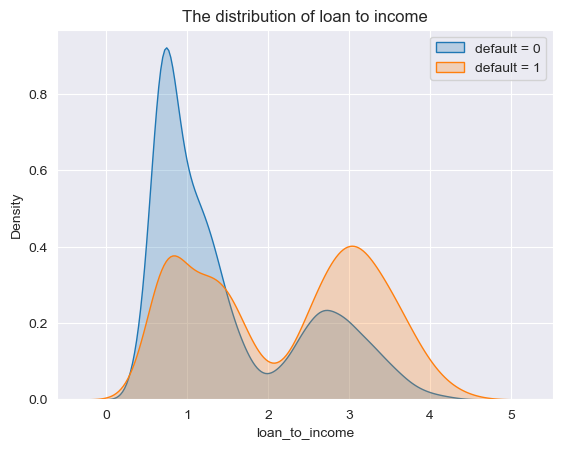

In [40]:
sns.kdeplot(df_train[df_train['default'] == 0]['loan_to_income'], fill=True, label='default = 0')
sns.kdeplot(df_train[df_train['default'] == 1]['loan_to_income'], fill=True, label='default = 1')
plt.legend()
plt.title("The distribution of loan to income")
plt.show()

* The insight 
* - The blue graph has the high density with value shift on the left side of loan to income ratio and the gather highest around 1
* - The orange graph has average density contribute around 1 and 3

In [41]:
# b. Delinquent months to loan months ratio is a better metric compared to those two individual features
df_train['delinquent_to_loan'] = df_train['delinquent_months'] * 100 / df_train['total_loan_months']
df_test['delinquent_to_loan'] = df_test['delinquent_months'] * 100 / df_test['total_loan_months']
df_train.head(2)


,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,loan_to_income,delinquent_to_loan
44124,34,M,Single,Salaried,600000,0,Mortgage,18,380001,2,...,2152000,43040.0,387360,1721600,30,357273,319551,False,3.586667,3.669725
835,42,F,Single,Self-Employed,1730000,1,Mortgage,13,500001,4,...,4360000,87200.0,784800,3488000,32,1280238,621793,False,2.520231,0.000000


In [42]:
df_train['delinquent_to_loan'].max()

100.0

In [43]:
df_train['delinquent_to_loan'].isna().sum()

0

In [44]:
df_test['delinquent_to_loan'].isna().sum()

0

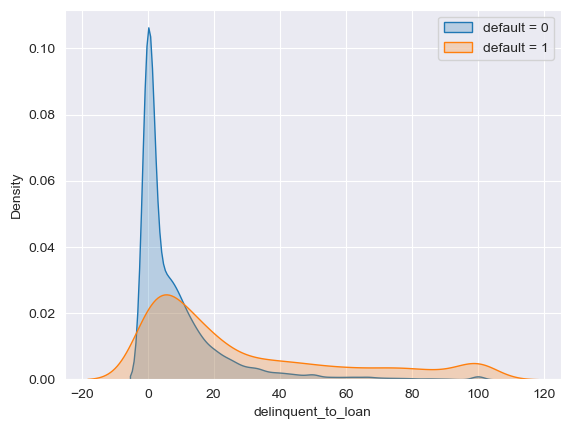

In [45]:
sns.kdeplot(df_train[df_train['default'] == 0]['delinquent_to_loan'], label='default = 0', fill=True)
sns.kdeplot(df_train[df_train['default'] == 1]['delinquent_to_loan'], label='default = 1', fill=True)
plt.legend()
plt.show()

* Get insight
* - The blue graph showed the highest density as few values on the left side
* - The orange graph showed small density when ratio on higher value 

In [46]:
df_train.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquent_to_loan'],
      dtype='object')

In [47]:
# c. Average DPD per delinquent month is a better metric compared to total dpd and total delinquent
df_train['avg_dpd_delinquent'] = np.where(df_train['delinquent_months'] != 0,
                                          (df_train['total_dpd'] / df_train['delinquent_months']), 0)
df_test['avg_dpd_delinquent'] = np.where(df_test['delinquent_months'] != 0,
                                         (df_test['total_dpd'] / df_test['delinquent_months']), 0)
df_train.head(2)

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
44124,34,M,Single,Salaried,600000,0,Mortgage,18,380001,2,...,43040.0,387360,1721600,30,357273,319551,False,3.586667,3.669725,4.5
835,42,F,Single,Self-Employed,1730000,1,Mortgage,13,500001,4,...,87200.0,784800,3488000,32,1280238,621793,False,2.520231,0.000000,0.0


In [48]:
df_train['avg_dpd_delinquent'].isna().sum()

0

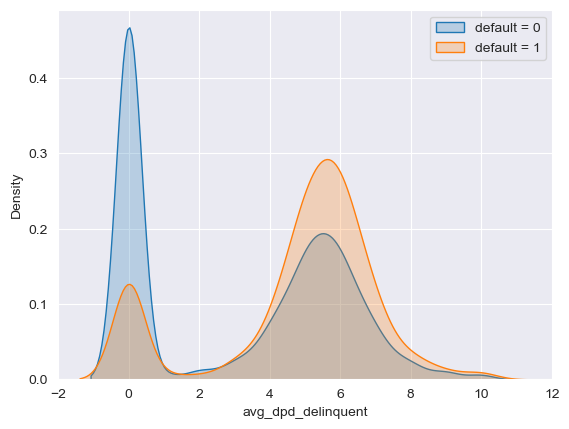

In [49]:
#plot kdeplot 
sns.kdeplot(df_train[df_train['default'] == 0]['avg_dpd_delinquent'], label='default = 0', fill=True)
sns.kdeplot(df_train[df_train['default'] == 1]['avg_dpd_delinquent'], label='default = 1', fill=True)
plt.legend()
plt.show()

* Get inside 
* - The Graph show very clear that the blue only gather highest at 0 value but orange graph is distributed almost the whole ratio horizontal. Its pretty good for prediction

In [50]:
# Check df_test dataset
df_test.head()

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,...,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
27632,45,M,Married,Self-Employed,369000,2,Mortgage,21,400001,2,...,8980.0,80820,359200,22,201059,123809,False,1.216802,11.320755,5.666667
36119,28,F,Single,Salaried,802000,2,Rented,29,380001,4,...,25540.0,229860,1021600,20,409393,200705,False,1.592269,0.000000,0.000000
4796,44,F,Single,Salaried,100000,1,Owned,11,560001,2,...,1280.0,11520,51200,8,46079,44873,False,0.640000,13.559322,6.375000
3648,47,M,Married,Self-Employed,2335000,2,Owned,29,226001,2,...,51700.0,465300,2068000,54,1441777,837611,False,1.107066,2.597403,5.500000
24501,41,M,Single,Self-Employed,2159000,2,Owned,5,700001,4,...,60360.0,543240,2414400,57,1297299,908901,False,1.397869,9.740260,4.066667


In [51]:
df_train_backup = df_train.copy()
check_min_max = ['loan_to_income','delinquent_to_loan','avg_dpd_delinquent']
for col in check_min_max:
    get_min = df_train_backup[col].min()
    get_max = df_train_backup[col].max()
    max_min = get_max - get_min
    print(f"{col} --> min : {round(get_min,2)}, max : {round(get_max,2)}, max-min : {round(max_min,2)}")



loan_to_income --> min : 0.3, max : 4.59, max-min : 4.3
delinquent_to_loan --> min : 0.0, max : 100.0, max-min : 100.0
avg_dpd_delinquent --> min : 0.0, max : 10.0, max-min : 10.0


#### Drop some unimportance columns

In [52]:
df_train.columns

Index(['age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquent_to_loan', 'avg_dpd_delinquent'],
      dtype='object')

In [53]:
df_train.drop(['loan_amount', 'income', 'delinquent_months', 'total_dpd', 'total_loan_months'], axis=1, inplace=True)
df_test.drop(['loan_amount', 'income', 'delinquent_months', 'total_dpd', 'total_loan_months'], axis=1, inplace=True)
print(df_train.shape)
print(df_test.shape)

(37491, 25)
(12494, 25)


### Check correlation

In [54]:
list_numerical = df_train.select_dtypes(include=['int64', 'float64']).columns
print(len(list_numerical))
list_numerical

18


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_to_loan',
       'avg_dpd_delinquent'],
      dtype='object')

In [55]:
list_get_correl = ['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
                   'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
                   'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
                   'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
                   'bank_balance_at_application', 'loan_to_income', 'delinquent_to_loan',
                   'avg_dpd_delinquent', 'default']

<Axes: >

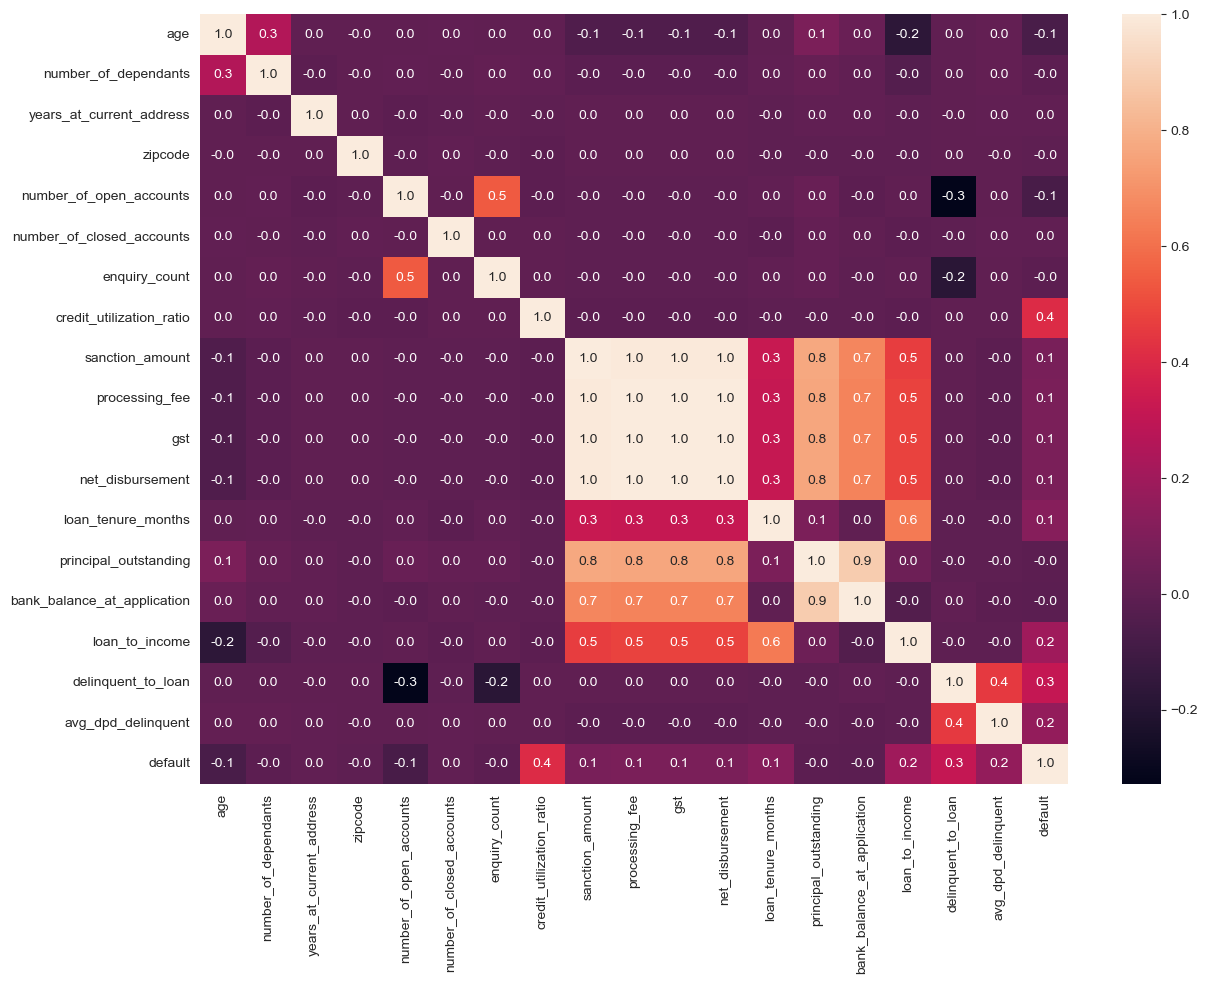

In [56]:
plt.figure(figsize=(14, 10))
cm = df_train[list_get_correl].corr()
sns.heatmap(cm, annot=True, fmt='.1f')

### Check VIF to get rid of unimportant columns

In [57]:
df_train.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_purpose',
       'loan_type', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquent_to_loan', 'avg_dpd_delinquent'],
      dtype='object')

In [58]:
col_to_scaler = df_train.select_dtypes(include=['int64', 'float']).columns
print(len(col_to_scaler))
col_to_scaler

18


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_to_loan',
       'avg_dpd_delinquent'],
      dtype='object')

#### Scaler value before working with VIF

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[col_to_scaler] = scaler.fit_transform(df_train[col_to_scaler])
df_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,...,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
44124,0.307692,M,Single,Salaried,0.0,Mortgage,0.566667,0.457627,0.333333,1.0,...,0.043883,0.043883,0.043883,0.452830,0.063996,0.038345,False,0.766105,0.036697,0.450000
835,0.461538,F,Single,Self-Employed,0.2,Mortgage,0.400000,0.661017,1.000000,0.5,...,0.090112,0.090112,0.090112,0.490566,0.250072,0.076959,False,0.517814,0.000000,0.000000
363,0.500000,F,Single,Self-Employed,0.0,Owned,0.533333,0.830508,0.666667,0.5,...,0.014844,0.014844,0.014844,0.679245,0.072902,0.012764,False,0.207613,0.000000,0.000000
6702,0.000000,F,Single,Self-Employed,0.2,Owned,0.533333,0.325424,0.666667,1.0,...,0.042962,0.042962,0.042962,0.377358,0.045813,0.028884,False,0.902910,0.021978,0.450000
40062,0.192308,F,Married,Salaried,0.6,Owned,0.900000,0.457627,1.000000,0.5,...,0.255951,0.255951,0.255951,0.566038,0.369976,0.109462,False,0.752920,0.094828,0.563636


In [60]:
scaler = MinMaxScaler()
df_test[col_to_scaler] = scaler.fit_transform(df_test[col_to_scaler])
df_test.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,...,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
27632,0.519231,M,Married,Self-Employed,0.4,Mortgage,0.666667,0.491525,0.333333,1.0,...,0.008379,0.008379,0.008379,0.301887,0.033409,0.014048,False,0.216436,0.113208,0.566667
36119,0.192308,F,Single,Salaried,0.4,Rented,0.933333,0.457627,1.000000,0.5,...,0.025768,0.025768,0.025768,0.264151,0.075371,0.024721,False,0.305307,0.000000,0.000000
4796,0.500000,F,Single,Salaried,0.2,Owned,0.333333,0.762712,0.333333,0.5,...,0.000294,0.000294,0.000294,0.037736,0.002193,0.003092,False,0.079910,0.135593,0.637500
3648,0.557692,M,Married,Self-Employed,0.4,Owned,0.933333,0.196610,0.333333,0.0,...,0.053237,0.053237,0.053237,0.905660,0.283311,0.113121,False,0.190462,0.025974,0.550000
24501,0.442308,M,Single,Self-Employed,0.4,Owned,0.133333,1.000000,1.000000,1.0,...,0.062331,0.062331,0.062331,0.962264,0.254211,0.123015,False,0.259294,0.097403,0.406667


In [61]:
# Create vif dataframe from function
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    df_vif = pd.DataFrame()
    df_vif['columns'] = data.columns
    df_vif['variance'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return df_vif


get_df_vif = calculate_vif(df_train[col_to_scaler])
get_df_vif

/Users/ricky/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,columns,variance
0,age,5.741039
1,number_of_dependants,2.723046
2,years_at_current_address,3.428453
3,zipcode,3.812656
4,number_of_open_accounts,4.352455
5,number_of_closed_accounts,2.380117
6,enquiry_count,6.406472
7,credit_utilization_ratio,2.924858
8,sanction_amount,101.360572
9,processing_fee,inf


In [62]:
# Get rid of columns with variance value greater than 10
get_col_vif_greater_than_10 = get_df_vif[get_df_vif['variance'] > 10]['columns'].tolist()
get_col_vif_greater_than_10

['sanction_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'principal_outstanding']

In [63]:
# Get rid columns which vif values > 10
df_train.drop(get_col_vif_greater_than_10, axis=1, inplace=True)
df_train.shape

(37491, 20)

* Drop same columns on train dataset

In [64]:
df_test.drop(get_col_vif_greater_than_10, axis=1, inplace=True)
df_test.shape

(12494, 20)

In [65]:
# Check again with new datasets for df_train
calculate_vif(df_train.select_dtypes(include=['int64', 'float']))


,columns,variance
0,age,5.477149
1,number_of_dependants,2.719447
2,years_at_current_address,3.410048
3,zipcode,3.792842
4,number_of_open_accounts,4.322017
5,number_of_closed_accounts,2.367214
6,enquiry_count,6.379644
7,credit_utilization_ratio,2.910646
8,loan_tenure_months,5.970523
9,bank_balance_at_application,1.811029


In [66]:
#Check df_train 
df_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,bank_balance_at_application,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
44124,0.307692,M,Single,Salaried,0.0,Mortgage,0.566667,0.457627,0.333333,1.0,0.625,0.222222,Home,Secured,0.452830,0.038345,False,0.766105,0.036697,0.450000
835,0.461538,F,Single,Self-Employed,0.2,Mortgage,0.400000,0.661017,1.000000,0.5,0.625,0.010101,Home,Secured,0.490566,0.076959,False,0.517814,0.000000,0.000000
363,0.500000,F,Single,Self-Employed,0.0,Owned,0.533333,0.830508,0.666667,0.5,0.625,0.232323,Education,Secured,0.679245,0.012764,False,0.207613,0.000000,0.000000
6702,0.000000,F,Single,Self-Employed,0.2,Owned,0.533333,0.325424,0.666667,1.0,0.625,0.707071,Home,Secured,0.377358,0.028884,False,0.902910,0.021978,0.450000
40062,0.192308,F,Married,Salaried,0.6,Owned,0.900000,0.457627,1.000000,0.5,0.625,0.575758,Home,Secured,0.566038,0.109462,False,0.752920,0.094828,0.563636


In [67]:
df_test.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,bank_balance_at_application,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
27632,0.519231,M,Married,Self-Employed,0.4,Mortgage,0.666667,0.491525,0.333333,1.0,0.750,0.050505,Education,Secured,0.301887,0.014048,False,0.216436,0.113208,0.566667
36119,0.192308,F,Single,Salaried,0.4,Rented,0.933333,0.457627,1.000000,0.5,0.750,0.666667,Education,Secured,0.264151,0.024721,False,0.305307,0.000000,0.000000
4796,0.500000,F,Single,Salaried,0.2,Owned,0.333333,0.762712,0.333333,0.5,0.625,0.222222,Personal,Unsecured,0.037736,0.003092,False,0.079910,0.135593,0.637500
3648,0.557692,M,Married,Self-Employed,0.4,Owned,0.933333,0.196610,0.333333,0.0,0.250,0.545455,Education,Secured,0.905660,0.113121,False,0.190462,0.025974,0.550000
24501,0.442308,M,Single,Self-Employed,0.4,Owned,0.133333,1.000000,1.000000,1.0,0.375,0.949495,Education,Secured,0.962264,0.123015,False,0.259294,0.097403,0.406667


### Feature Engineering with categorical columns

* We will determine woe and iv to get only the categorical columns which impact to the prediction

In [68]:
feature_categories = df_train.select_dtypes(include='object').columns

In [69]:
def calculate_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    grouped['pct_good'] = grouped['good'] / grouped['good'].sum()
    grouped['pct_bad'] = grouped['bad'] / grouped['bad'].sum()
    grouped['woe'] = np.log(grouped['pct_good'] / grouped['pct_bad'])
    grouped['iv'] = grouped['woe'] * (grouped['pct_good'] - grouped['pct_bad'])
    grouped['woe'] = grouped['woe'].replace([np.inf, np.nan], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, np.nan], 0)
    iv = grouped['iv'].sum()
    return grouped, iv

grouped, iv = calculate_iv(df_train, 'loan_purpose', 'default')
grouped


,total,good,bad,pct_good,pct_bad,woe,iv
loan_purpose,,,,,,,
Auto,7461,329,7132,0.101543,0.208227,-0.718147,0.076615
Education,5658,556,5102,0.171605,0.148959,0.141523,0.003205
Home,11259,1742,9517,0.537654,0.277861,0.660097,0.171489
Personal,13113,613,12500,0.189198,0.364953,-0.656977,0.115467


In [70]:
iv_holder = {}
for feature in df_train.drop('default', axis=1).columns:
    if df_train[feature].dtype == 'object':
        _, iv = calculate_iv(df_train, feature, 'default')
    else:
        X_binned = pd.cut(df_train[feature], bins=10, labels=False)
        _, iv = calculate_iv(pd.concat([X_binned, df_train['default']], axis=1), feature, 'default')
    iv_holder[feature] = iv
iv_holder

/Users/ricky/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'age': 0.07675458593186438,
 'gender': 0.00017534790538675156,
 'marital_status': 0.002024567374508581,
 'employment_status': 0.003249631339548047,
 'number_of_dependants': 0.0027794453358886842,
 'residence_type': 0.24980598527799835,
 'years_at_current_address': 0.003490533435557687,
 'zipcode': 0.0017600874786006613,
 'number_of_open_accounts': 0.09103344310584284,
 'number_of_closed_accounts': 0.0006221474563957116,
 'enquiry_count': 0.009296503108893834,
 'credit_utilization_ratio': 2.42767737470768,
 'loan_purpose': 0.36677602461817715,
 'loan_type': 0.15840857754970483,
 'loan_tenure_months': 0.2069453974444304,
 'bank_balance_at_application': 0.004610037061086237,
 'loan_to_income': 0.46659810080991343,
 'delinquent_to_loan': 0.7084828294886484,
 'avg_dpd_delinquent': 0.41300468500538423}

In [71]:
row = []
for key, item in iv_holder.items():
    row.append({'features': key, 'iv': item})
    df_woe_iv = pd.DataFrame(row).sort_values(by=['iv'], ascending=False).reset_index(drop=True)
df_woe_iv



,features,iv
0,credit_utilization_ratio,2.427677
1,delinquent_to_loan,0.708483
2,loan_to_income,0.466598
3,avg_dpd_delinquent,0.413005
4,loan_purpose,0.366776
5,residence_type,0.249806
6,loan_tenure_months,0.206945
7,loan_type,0.158409
8,number_of_open_accounts,0.091033
9,age,0.076755


* Get rid of feature which iv less than 0.02

In [72]:
# Columns which iv less than 0.02
list_feature_out_iv = df_woe_iv[df_woe_iv['iv'] < 0.02]['features'].values
list_feature_out_iv

array(['enquiry_count', 'bank_balance_at_application',
       'years_at_current_address', 'employment_status',
       'number_of_dependants', 'marital_status', 'zipcode',
       'number_of_closed_accounts', 'gender'], dtype=object)

In [73]:
#Drop feature which not qualified for iv values
df_train.drop(list_feature_out_iv, axis=1, inplace=True)


In [74]:
df_train.head()

,age,residence_type,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
44124,0.307692,Mortgage,0.333333,0.222222,Home,Secured,0.452830,False,0.766105,0.036697,0.450000
835,0.461538,Mortgage,1.000000,0.010101,Home,Secured,0.490566,False,0.517814,0.000000,0.000000
363,0.500000,Owned,0.666667,0.232323,Education,Secured,0.679245,False,0.207613,0.000000,0.000000
6702,0.000000,Owned,0.666667,0.707071,Home,Secured,0.377358,False,0.902910,0.021978,0.450000
40062,0.192308,Owned,1.000000,0.575758,Home,Secured,0.566038,False,0.752920,0.094828,0.563636


In [75]:
df_test.drop(list_feature_out_iv, axis=1, inplace=True)
df_test.head()

,age,residence_type,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent
27632,0.519231,Mortgage,0.333333,0.050505,Education,Secured,0.301887,False,0.216436,0.113208,0.566667
36119,0.192308,Rented,1.000000,0.666667,Education,Secured,0.264151,False,0.305307,0.000000,0.000000
4796,0.500000,Owned,0.333333,0.222222,Personal,Unsecured,0.037736,False,0.079910,0.135593,0.637500
3648,0.557692,Owned,0.333333,0.545455,Education,Secured,0.905660,False,0.190462,0.025974,0.550000
24501,0.442308,Owned,1.000000,0.949495,Education,Secured,0.962264,False,0.259294,0.097403,0.406667


* Encoder for list categories feature

In [76]:
df_train_encoded = pd.get_dummies(df_train, drop_first=True, dtype=int)
df_train_encoded.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
44124,0.307692,0.333333,0.222222,0.452830,False,0.766105,0.036697,0.450000,0,0,0,1,0,0
835,0.461538,1.000000,0.010101,0.490566,False,0.517814,0.000000,0.000000,0,0,0,1,0,0
363,0.500000,0.666667,0.232323,0.679245,False,0.207613,0.000000,0.000000,1,0,1,0,0,0
6702,0.000000,0.666667,0.707071,0.377358,False,0.902910,0.021978,0.450000,1,0,0,1,0,0
40062,0.192308,1.000000,0.575758,0.566038,False,0.752920,0.094828,0.563636,1,0,0,1,0,0


In [77]:
df_test_encoded = pd.get_dummies(df_test, drop_first=True)
df_test_encoded.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,default,loan_to_income,delinquent_to_loan,avg_dpd_delinquent,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27632,0.519231,0.333333,0.050505,0.301887,False,0.216436,0.113208,0.566667,False,False,True,False,False,False
36119,0.192308,1.000000,0.666667,0.264151,False,0.305307,0.000000,0.000000,False,True,True,False,False,False
4796,0.500000,0.333333,0.222222,0.037736,False,0.079910,0.135593,0.637500,True,False,False,False,True,True
3648,0.557692,0.333333,0.545455,0.905660,False,0.190462,0.025974,0.550000,True,False,True,False,False,False
24501,0.442308,1.000000,0.949495,0.962264,False,0.259294,0.097403,0.406667,True,False,True,False,False,False


<h2 align='center'>Training Model<h2>

#### Create the train and test datasets

In [78]:
X_train = df_train_encoded.drop('default', axis=1)
y_train = df_train_encoded['default']
X_train.shape, y_train.shape

((37491, 13), (37491,))

In [79]:
X_train.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquent_to_loan,avg_dpd_delinquent,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
44124,0.307692,0.333333,0.222222,0.452830,0.766105,0.036697,0.450000,0,0,0,1,0,0
835,0.461538,1.000000,0.010101,0.490566,0.517814,0.000000,0.000000,0,0,0,1,0,0
363,0.500000,0.666667,0.232323,0.679245,0.207613,0.000000,0.000000,1,0,1,0,0,0
6702,0.000000,0.666667,0.707071,0.377358,0.902910,0.021978,0.450000,1,0,0,1,0,0
40062,0.192308,1.000000,0.575758,0.566038,0.752920,0.094828,0.563636,1,0,0,1,0,0


In [80]:
X_test = df_test_encoded.drop('default', axis=1)
y_test = df_test_encoded['default']
X_test.shape, y_test.shape

((12494, 13), (12494,))

In [81]:
X_test.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquent_to_loan,avg_dpd_delinquent,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27632,0.519231,0.333333,0.050505,0.301887,0.216436,0.113208,0.566667,False,False,True,False,False,False
36119,0.192308,1.000000,0.666667,0.264151,0.305307,0.000000,0.000000,False,True,True,False,False,False
4796,0.500000,0.333333,0.222222,0.037736,0.079910,0.135593,0.637500,True,False,False,False,True,True
3648,0.557692,0.333333,0.545455,0.905660,0.190462,0.025974,0.550000,True,False,True,False,False,False
24501,0.442308,1.000000,0.949495,0.962264,0.259294,0.097403,0.406667,True,False,True,False,False,False


### Attempt 1 : Training model with LogisticRegressor, RandomForest, Xgboost
### The requirement is the recall need to greater than 0.9 ( 90% ) of True Positive values 
#### 1/ Training without resampling

In [82]:
# Training with Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98     11437
        True       0.81      0.71      0.76      1057

    accuracy                           0.96     12494
   macro avg       0.89      0.85      0.87     12494
weighted avg       0.96      0.96      0.96     12494



In [83]:
df_ex_logistic = pd.DataFrame(model_logistic.coef_[0], columns=['Coefficient'], index=X_train.columns).sort_values(by=['Coefficient'], ascending=True)
df_ex_logistic

,Coefficient
residence_type_Owned,-1.441965
loan_purpose_Home,-1.270805
age,-0.536765
loan_tenure_months,0.376017
number_of_open_accounts,0.573104
loan_purpose_Personal,0.632975
loan_type_Unsecured,0.632975
loan_purpose_Education,1.034354
residence_type_Rented,1.480431
avg_dpd_delinquent,2.091596


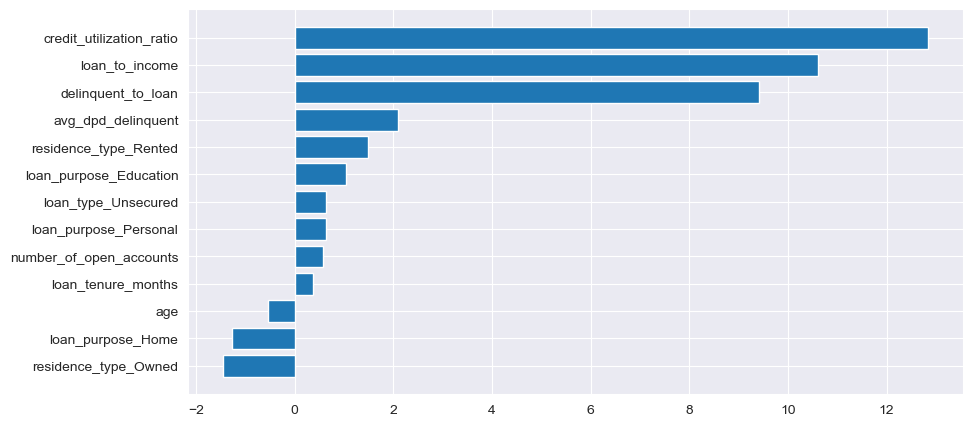

In [84]:
plt.figure(figsize=(10,5))
plt.barh(df_ex_logistic.index.values, df_ex_logistic['Coefficient'])
plt.show()

In [85]:
# Training with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_rdf = RandomForestClassifier()
model_rdf.fit(X_train, y_train)
y_pred_rdf = model_rdf.predict(X_test)
print(classification_report(y_test, y_pred_rdf))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     11437
        True       0.82      0.70      0.75      1057

    accuracy                           0.96     12494
   macro avg       0.90      0.84      0.87     12494
weighted avg       0.96      0.96      0.96     12494



In [86]:
# Training with Xgboost 
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     11437
        True       0.79      0.76      0.78      1057

    accuracy                           0.96     12494
   macro avg       0.88      0.87      0.88     12494
weighted avg       0.96      0.96      0.96     12494



In [87]:
# Training with RandomCv 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the model
logistic_model = LogisticRegression(random_state=42)

# RandomizedSearchCV
logistic_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='roc_auc',  # Metric to optimize
    cv=5,  # Number of folds
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42  # Reproducibility
)
logistic_search.fit(X_train, y_train)
y_pred_logistic = logistic_search.predict(X_test)
print(classification_report(y_test, y_pred_logistic))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
              precision    recall  f1-score   support

       False       0.97      0.98      0.98     11437
        True       0.80      0.72      0.76      1057

    accuracy                           0.96     12494
   macro avg       0.89      0.85      0.87     12494
weighted avg       0.96      0.96      0.96     12494



In [88]:
# RandomsearchCv with Xgboost

xgboost_params = {
    'n_estimators': [50, 100, 200, 500],          # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],                  # Maximum depth of the tree
    'learning_rate': loguniform(1e-4, 0.5),      # Learning rate (eta)
    'subsample': uniform(0.5, 0.5),              # Subsample ratio of the training set
    'colsample_bytree': uniform(0.5, 0.5),       # Subsample ratio of features
    'gamma': loguniform(1e-4, 10),               # Minimum loss reduction
    'reg_alpha': loguniform(1e-4, 10),           # L1 regularization term
    'reg_lambda': loguniform(1e-4, 10),          # L2 regularization term
    'min_child_weight': [1, 3, 5, 7],            # Minimum sum of instance weight needed in a child
}

# Create the model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgboost_params,
    n_iter=50,             # Number of parameter settings to sample
    scoring='roc_auc',     # Metric to optimize
    cv=5,                  # Number of folds
    verbose=2,
    n_jobs=-1,             # Use all available processors
    random_state=42        # Reproducibility
)
xgb_search.fit(X_train, y_train)
y_pred_xgb = xgb_search.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
              precision    recall  f1-score   support

       False       0.98      0.99      0.98     11437
        True       0.83      0.76      0.79      1057

    accuracy                           0.97     12494
   macro avg       0.90      0.87      0.89     12494
weighted avg       0.97      0.97      0.97     12494



In [89]:
best_estimator = xgb_search.best_estimator_
feature_importance = best_estimator.feature_importances_
feature_importance

array([0.01501478, 0.02159798, 0.2896175 , 0.01757798, 0.0732749 ,
       0.12627043, 0.05273771, 0.08085944, 0.09700195, 0.02852426,
       0.16087788, 0.0211689 , 0.01547632], dtype=float32)

In [90]:
df_feature_rdcv = pd.DataFrame(feature_importance, index=X_train.columns, columns=['coefficient']).sort_values(by=['coefficient'], ascending=True)
df_feature_rdcv

,coefficient
age,0.015015
loan_type_Unsecured,0.015476
loan_tenure_months,0.017578
loan_purpose_Personal,0.021169
number_of_open_accounts,0.021598
loan_purpose_Education,0.028524
avg_dpd_delinquent,0.052738
loan_to_income,0.073275
residence_type_Owned,0.080859
residence_type_Rented,0.097002


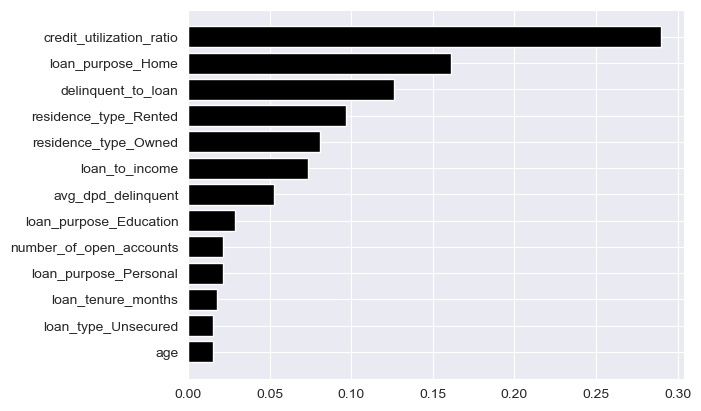

In [91]:
plt.barh(df_feature_rdcv.index.values, df_feature_rdcv['coefficient'], color = 'black')
plt.show()

#### The accuracy is pretty good, but the recall is quite low. We need recall should greater than 0.9
#### 2 / Training model with resampling

In [92]:
# Train with RandomOversampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
model_logistic_rus = LogisticRegression(random_state=42)
model_logistic_rus.fit(X_train_ros, y_train_ros)
y_pred_logistic_rus = model_logistic_rus.predict(X_test)
print(classification_report(y_test, y_pred_logistic_rus))

              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11437
        True       0.52      0.96      0.67      1057

    accuracy                           0.92     12494
   macro avg       0.76      0.94      0.81     12494
weighted avg       0.96      0.92      0.93     12494



In [93]:
y_train_ros.value_counts()

default
False    34251
True     34251
Name: count, dtype: int64

In [94]:
# Train with Random under sampler
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
model_logistic_us = LogisticRegression(max_iter=1000)
model_logistic_us.fit(X_train_rus, y_train_rus)
y_pred_logistic_us = model_logistic_us.predict(X_test)
print(classification_report(y_test, y_pred_logistic_us))



              precision    recall  f1-score   support

       False       1.00      0.91      0.95     11437
        True       0.50      0.96      0.66      1057

    accuracy                           0.91     12494
   macro avg       0.75      0.94      0.80     12494
weighted avg       0.95      0.91      0.93     12494



In [95]:
y_train_rus.value_counts()

default
False    3240
True     3240
Name: count, dtype: int64

In [96]:
# Train with Smoteemk
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_logistic_smote = LogisticRegression(max_iter=1000)
model_logistic_smote.fit(X_train_smote, y_train_smote)
y_pred_logistic_smote = model_logistic_smote.predict(X_test)
print(classification_report(y_test, y_pred_logistic_smote))

              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11437
        True       0.54      0.95      0.69      1057

    accuracy                           0.93     12494
   macro avg       0.77      0.94      0.82     12494
weighted avg       0.96      0.93      0.94     12494



In [97]:
model_logistic_smote.coef_

array([[-0.08000757,  0.91144145, 14.84298965,  0.57111955, 15.52044549,
        12.37126781,  2.02626057, -1.69030102,  1.71785111,  0.96307485,
        -2.83450096,  0.94592825,  0.94592825]])

In [98]:
y_train_smote.value_counts()

default
False    34174
True     34174
Name: count, dtype: int64

In [99]:
# Train Xgboost with X train, y train smote
model_xgb_smote = XGBClassifier(random_state=42)
model_xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = model_xgb_smote.predict(X_test)
print(classification_report(y_test, y_pred_xgb_smote))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98     11437
        True       0.70      0.85      0.77      1057

    accuracy                           0.96     12494
   macro avg       0.84      0.91      0.87     12494
weighted avg       0.96      0.96      0.96     12494



* The prediction table above showed the accuracy from xgboost training model is pretty good : 0.96 but the recall is 0.85 ( It's not qualified )
* The training model from LogisticRegressor with smote value is pretty good as both accuracy and recall : 0.93 , 0.95 respectively 
* But we will determine one more method call Optuna to get the best model training and Recall value with Smote data 

In [100]:
# try with Optuna method for LogisticRegressor
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }
    model_optuna_logistic = LogisticRegression(**param, max_iter=10000)
    f1_scorer = make_scorer(f1_score, average='macro')
    score = cross_val_score(model_optuna_logistic, X_train_smote, y_train_smote, cv=3, scoring=f1_scorer, n_jobs=-1)
    return np.mean(score)


study_lg = optuna.create_study(direction='maximize')
study_lg.optimize(objective, n_trials=50)

# print(f"best param : {study_lg.best_params}, best score : {study_lg.best_value}")


[I 2024-12-08 16:25:10,446] A new study created in memory with name: no-name-70fd4393-8e25-4a00-80a4-06d6dbcb4fc7
[I 2024-12-08 16:25:10,714] Trial 0 finished with value: 0.8302429808371986 and parameters: {'C': 0.00011416772360534129, 'solver': 'newton-cg', 'tol': 0.00010052696008479254, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8302429808371986.
[I 2024-12-08 16:25:11,101] Trial 1 finished with value: 0.9446814859411515 and parameters: {'C': 6480.175413709255, 'solver': 'liblinear', 'tol': 9.859164308035027e-06, 'class_weight': None}. Best is trial 1 with value: 0.9446814859411515.
[I 2024-12-08 16:25:11,259] Trial 2 finished with value: 0.8104076027208743 and parameters: {'C': 0.002937463843499195, 'solver': 'lbfgs', 'tol': 0.04127324692881131, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9446814859411515.
[I 2024-12-08 16:25:11,454] Trial 3 finished with value: 0.9412725362587994 and parameters: {'C': 0.8865940529774871, 'solver': 'newton-cg', 'tol': 

In [101]:
trial = study_lg.best_trial
print("Best param : ")
for i in trial.params.items() :
    print(i)
best_model_optuna_logistic = LogisticRegression(**study_lg.best_params)
best_model_optuna_logistic.fit(X_train_smote, y_train_smote)
y_pred_optuna_logistic = best_model_optuna_logistic.predict(X_test)
print(classification_report(y_test, y_pred_optuna_logistic))

Best param : 
('C', 3.5990912673114965)
('solver', 'liblinear')
('tol', 9.168025396742877e-05)
('class_weight', None)
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11437
        True       0.53      0.95      0.68      1057

    accuracy                           0.93     12494
   macro avg       0.77      0.94      0.82     12494
weighted avg       0.96      0.93      0.93     12494



In [102]:
best_model_optuna_logistic.coef_

array([[ 0.13129424,  0.96901957, 15.50339605,  0.55892727, 17.11698171,
        12.97769601,  2.06046871, -1.7533045 ,  1.77860838,  0.89970251,
        -3.39144173,  1.01939571,  1.01939571]])

In [103]:
# Try optuna with xgboost
# Optuna xgboost 
import optuna

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }
    
    model_optuna_xgb = XGBClassifier(**param)
    f1_scorer = make_scorer(f1_score, average='macro')
    score = cross_val_score(model_optuna_xgb, X_train_smote, y_train_smote, cv=3, scoring=f1_scorer, n_jobs=-1)
    return np.mean(score)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)
# print(f"best params :{study_xgb.best_params}, best score : {study_xgb.best_value}")

[I 2024-12-08 16:25:27,025] A new study created in memory with name: no-name-af9399a9-78ca-4c52-a24a-a49902ca88b0
[I 2024-12-08 16:25:27,786] Trial 0 finished with value: 0.9546278019508537 and parameters: {'lambda': 0.0022525247670774668, 'alpha': 0.002421807226077371, 'subsample': 0.6946646990060894, 'colsample_bytree': 0.5572665501811906, 'max_depth': 5, 'eta': 0.05933943511986321, 'gamma': 6.974486082225199, 'scale_pos_weight': 1.3963246917405545, 'min_child_weight': 10, 'max_delta_step': 1}. Best is trial 0 with value: 0.9546278019508537.
[I 2024-12-08 16:25:29,167] Trial 1 finished with value: 0.8876451572353733 and parameters: {'lambda': 0.018151503759324134, 'alpha': 6.08539961894563, 'subsample': 0.8646717422284402, 'colsample_bytree': 0.7310719426996344, 'max_depth': 7, 'eta': 0.01578236172377498, 'gamma': 7.953052435000002, 'scale_pos_weight': 9.882834235437775, 'min_child_weight': 3, 'max_delta_step': 6}. Best is trial 0 with value: 0.9546278019508537.
[I 2024-12-08 16:25:2

In [104]:
trial = study_xgb.best_trial
print("Best param : ")
for key, value in trial.params.items() :
    print(key, value)
print(f"best score : {study_xgb.best_value}")

best_model_optuna_xgb = XGBClassifier(**study_xgb.best_params)
best_model_optuna_xgb.fit(X_train_smote, y_train_smote)
y_pred_optuna_xgb = best_model_optuna_xgb.predict(X_test)
print(classification_report(y_test, y_pred_optuna_xgb))

Best param : 
lambda 0.04581113280236139
alpha 0.5437049695720216
subsample 0.8294009777668474
colsample_bytree 0.7904192586254698
max_depth 9
eta 0.21848539401797148
gamma 1.429541646285994
scale_pos_weight 1.0233813252658424
min_child_weight 5
max_delta_step 5
best score : 0.9751224808680891
              precision    recall  f1-score   support

       False       0.99      0.97      0.98     11437
        True       0.70      0.86      0.77      1057

    accuracy                           0.96     12494
   macro avg       0.84      0.91      0.87     12494
weighted avg       0.96      0.96      0.96     12494



### We will choose best model of logistic optuna

### Explore AUC, ROC 

In [105]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

probabilities = best_model_optuna_logistic.predict_proba(X_test)[:,1]
probabilities

array([9.57491457e-06, 3.18924478e-01, 9.54977503e-06, ...,
       3.65759858e-05, 2.22630157e-05, 4.77751472e-07])

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

In [107]:
area = auc(fpr, tpr)
area

0.9827622161768279

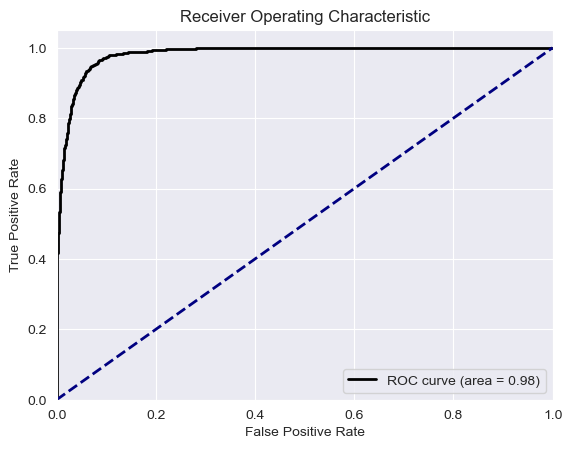

In [108]:
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
best_model_optuna_logistic.coef_

array([[ 0.13129424,  0.96901957, 15.50339605,  0.55892727, 17.11698171,
        12.97769601,  2.06046871, -1.7533045 ,  1.77860838,  0.89970251,
        -3.39144173,  1.01939571,  1.01939571]])

#### Show barh chart to get he insight of Coefficient feature in probabilities of risk

In [110]:
df_best_model = pd.DataFrame(best_model_optuna_logistic.coef_[0], index=X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=True)
df_best_model

,Coefficient
loan_purpose_Home,-3.391442
residence_type_Owned,-1.753304
age,0.131294
loan_tenure_months,0.558927
loan_purpose_Education,0.899703
number_of_open_accounts,0.969020
loan_purpose_Personal,1.019396
loan_type_Unsecured,1.019396
residence_type_Rented,1.778608
avg_dpd_delinquent,2.060469


<function matplotlib.pyplot.show(close=None, block=None)>

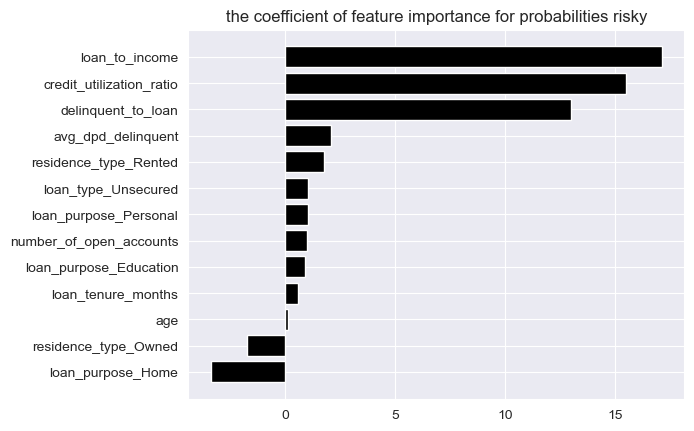

In [111]:
plt.barh(df_best_model.index.values, df_best_model.Coefficient, color = 'black')
plt.title("the coefficient of feature importance for probabilities risky")
plt.show

<h2 align='center'>Check Rank Ordering and K-Statistics<h2> 

In [112]:
probabilities = best_model_optuna_logistic.predict_proba(X_test)[:,1]
probabilities

array([9.57491457e-06, 3.18924478e-01, 9.54977503e-06, ...,
       3.65759858e-05, 2.22630157e-05, 4.77751472e-07])

In [113]:
grouped = pd.DataFrame({
    'default_truth' : y_test.astype('int'),
    'default_probabilities' : probabilities
})
grouped

,default_truth,default_probabilities
27632,0,9.574915e-06
36119,0,3.189245e-01
4796,0,9.549775e-06
3648,0,1.001984e-03
24501,0,8.619475e-01
...,...,...
25838,0,1.162532e-05
21073,0,8.516750e-01
45165,0,3.657599e-05
6117,0,2.226302e-05


In [114]:
grouped['decile'] = pd.cut(grouped['default_probabilities'], bins= 10, labels=False, duplicates='drop')
grouped.head()

,default_truth,default_probabilities,decile
27632,0,0.000010,0
36119,0,0.318924,3
4796,0,0.000010,0
3648,0,0.001002,0
24501,0,0.861947,8


In [115]:

get_KS = grouped.groupby('decile').apply(lambda x : pd.Series({
    'minimum_probabilities' : x['default_probabilities'].min(),
    'maximum_probabilities' : x['default_probabilities'].max(),
    'event' : x['default_truth'].sum(),
    'non_event' : x['default_truth'].count() - x['default_truth'].sum()
}),include_groups=False)
get_KS.reset_index(inplace=True)
get_KS.head()

,decile,minimum_probabilities,maximum_probabilities,event,non_event
0,0,4.894571e-09,0.099942,12.0,9377.0
1,1,1.000378e-01,0.199497,3.0,474.0
2,2,2.000061e-01,0.299890,7.0,289.0
3,3,3.013330e-01,0.399479,13.0,243.0
4,4,4.005013e-01,0.499705,16.0,179.0


In [116]:
get_KS['event_rate'] = get_KS['event'] *100/ (get_KS['non_event'] + get_KS['event'])
get_KS['non_event_rate'] = get_KS['non_event'] *100 / (get_KS['non_event'] + get_KS['event'])
df_Ks=get_KS.sort_values(by='decile', ascending=False)
df_Ks.head()

,decile,minimum_probabilities,maximum_probabilities,event,non_event,event_rate,non_event_rate
9,9,0.900749,1.000000,778.0,225.0,77.567298,22.432702
8,8,0.800019,0.899843,128.0,169.0,43.097643,56.902357
7,7,0.701070,0.799969,48.0,154.0,23.762376,76.237624
6,6,0.600098,0.699977,34.0,158.0,17.708333,82.291667
5,5,0.500581,0.599075,18.0,169.0,9.625668,90.374332


In [117]:
df_Ks['cum_event'] = df_Ks['event'].cumsum()
df_Ks['cum_non_event'] = df_Ks['non_event'].cumsum()
df_Ks.head()

,decile,minimum_probabilities,maximum_probabilities,event,non_event,event_rate,non_event_rate,cum_event,cum_non_event
9,9,0.900749,1.000000,778.0,225.0,77.567298,22.432702,778.0,225.0
8,8,0.800019,0.899843,128.0,169.0,43.097643,56.902357,906.0,394.0
7,7,0.701070,0.799969,48.0,154.0,23.762376,76.237624,954.0,548.0
6,6,0.600098,0.699977,34.0,158.0,17.708333,82.291667,988.0,706.0
5,5,0.500581,0.599075,18.0,169.0,9.625668,90.374332,1006.0,875.0


In [118]:
df_Ks['cum_event_rate'] = df_Ks['cum_event']*100/df_Ks['event'].sum()
df_Ks['cum_non_event_rate'] = df_Ks['cum_non_event']*100/df_Ks['non_event'].sum()
df_Ks.head()

,decile,minimum_probabilities,maximum_probabilities,event,non_event,event_rate,non_event_rate,cum_event,cum_non_event,cum_event_rate,cum_non_event_rate
9,9,0.900749,1.000000,778.0,225.0,77.567298,22.432702,778.0,225.0,73.604541,1.967299
8,8,0.800019,0.899843,128.0,169.0,43.097643,56.902357,906.0,394.0,85.714286,3.444959
7,7,0.701070,0.799969,48.0,154.0,23.762376,76.237624,954.0,548.0,90.255440,4.791466
6,6,0.600098,0.699977,34.0,158.0,17.708333,82.291667,988.0,706.0,93.472091,6.172947
5,5,0.500581,0.599075,18.0,169.0,9.625668,90.374332,1006.0,875.0,95.175024,7.650608


In [119]:
df_Ks['KS'] = abs(df_Ks['cum_event_rate'] - df_Ks['cum_non_event_rate'])
df_Ks

,decile,minimum_probabilities,maximum_probabilities,event,non_event,event_rate,non_event_rate,cum_event,cum_non_event,cum_event_rate,cum_non_event_rate,KS
9,9,9.007487e-01,1.000000,778.0,225.0,77.567298,22.432702,778.0,225.0,73.604541,1.967299,71.637242
8,8,8.000192e-01,0.899843,128.0,169.0,43.097643,56.902357,906.0,394.0,85.714286,3.444959,82.269326
7,7,7.010704e-01,0.799969,48.0,154.0,23.762376,76.237624,954.0,548.0,90.255440,4.791466,85.463974
6,6,6.000977e-01,0.699977,34.0,158.0,17.708333,82.291667,988.0,706.0,93.472091,6.172947,87.299143
5,5,5.005814e-01,0.599075,18.0,169.0,9.625668,90.374332,1006.0,875.0,95.175024,7.650608,87.524416
4,4,4.005013e-01,0.499705,16.0,179.0,8.205128,91.794872,1022.0,1054.0,96.688742,9.215703,87.473038
3,3,3.013330e-01,0.399479,13.0,243.0,5.078125,94.921875,1035.0,1297.0,97.918638,11.340386,86.578251
2,2,2.000061e-01,0.299890,7.0,289.0,2.364865,97.635135,1042.0,1586.0,98.580889,13.867273,84.713616
1,1,1.000378e-01,0.199497,3.0,474.0,0.628931,99.371069,1045.0,2060.0,98.864711,18.011716,80.852995
0,0,4.894571e-09,0.099942,12.0,9377.0,0.127809,99.872191,1057.0,11437.0,100.000000,100.000000,0.000000


In [120]:
# Define Gini values
Gini = area *2 - 1 
Gini

0.9655244323536558

* The KS in top 3 of order of decile have value in 1 of the highest values. Value in top 3 is 85% > 40% --> This model training is pretty good for prediction
* Gini coefficient is 0.96 > 0.85 --> This's considered a good model

<h2 align='center'> Retrive Model <h2>

In [121]:
print(len(col_to_scaler))
col_to_scaler

18


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income', 'delinquent_to_loan',
       'avg_dpd_delinquent'],
      dtype='object')

In [122]:
best_model = best_model_optuna_logistic


In [123]:
feature = X_train_smote.columns
print(len(feature))
feature

13


Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'delinquent_to_loan',
       'avg_dpd_delinquent', 'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [124]:
from joblib import dump
list_model = {
    'scaler' : scaler,
    'col_to_scaler' : col_to_scaler,
    'best_model' : best_model_optuna_logistic,
    'feature' : feature
}
dump(list_model,"artifact/save_model.joblib")

['artifact/save_model.joblib']

In [125]:
X_train_smote.head()

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,delinquent_to_loan,avg_dpd_delinquent,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
0,0.307692,0.333333,0.222222,0.452830,0.766105,0.036697,0.450000,0,0,0,1,0,0
1,0.461538,1.000000,0.010101,0.490566,0.517814,0.000000,0.000000,0,0,0,1,0,0
2,0.500000,0.666667,0.232323,0.679245,0.207613,0.000000,0.000000,1,0,1,0,0,0
3,0.000000,0.666667,0.707071,0.377358,0.902910,0.021978,0.450000,1,0,0,1,0,0
4,0.192308,1.000000,0.575758,0.566038,0.752920,0.094828,0.563636,1,0,0,1,0,0
